## Imports

In [2]:
from stats.chi_square_test import ChiSquareTest
import random
import scipy
import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

### Test for an uniform distribution

In [3]:
random.seed(0)
N = 1000
X = [random.uniform(0, 1) for _ in range(N)]
K = 10
numpy_histogram = []

c = 1

chi_square_test_object = ChiSquareTest(K) # The ChiSquareTest object implemented

chi2_results = {
    'paper': [],
    'histogram': [],
    'scipy': [],
    'critical': [],
    'quantile1': [],
    'quantile2': []}

for i, x in enumerate(X, start=1):
    
    chi_square_test_object.update(x)
    numpy_histogram, _ = np.histogram(X[:i], bins=K)
    
    # Results with the our implemented algorithms
    chi2_results['paper'].append(chi_square_test_object.get('paper'))
    chi2_results['histogram'].append(chi_square_test_object.get('histogram'))
    chi2_results['quantile1'].append(chi_square_test_object.get('quantile1'))
    chi2_results['quantile2'].append(chi_square_test_object.get('quantile2'))    
    
    # Results with the scipy function
    chi2_results['scipy'].append(scipy.stats.chisquare(numpy_histogram)[0])
    chi2_results['critical'].append(scipy.stats.chi2.ppf(1 - 0.005, K-c))


### Test for a normal distribution

In [20]:
random.seed(0)
N = 1000
X = [np.random.normal(0, 1) for _ in range(N)]
K = 10
numpy_histogram = []

c = 1

chi_square_test_object = ChiSquareTest(K) # The ChiSquareTest object implemented

chi2_results = {
    'paper': [],
    'histogram': [],
    'scipy': [],
    'critical': [],
    'quantile1': [],
    'quantile2': []}

for i, x in enumerate(X, start=1):
    
    chi_square_test_object.update(x)
    numpy_histogram, _ = np.histogram(X[:i], bins=K)
    
    # Results with the our implemented algorithms
    chi2_results['paper'].append(chi_square_test_object.get('paper'))
    chi2_results['histogram'].append(chi_square_test_object.get('histogram'))
    chi2_results['quantile1'].append(chi_square_test_object.get('quantile1'))
    chi2_results['quantile2'].append(chi_square_test_object.get('quantile2'))    
    
    # Results with the scipy function
    chi2_results['scipy'].append(scipy.stats.chisquare(numpy_histogram)[0])
    chi2_results['critical'].append(scipy.stats.chi2.ppf(1 - 0.005, K-c))



## Present our results

The hypothesis fails to reject if the chi2 value is below the critical value 



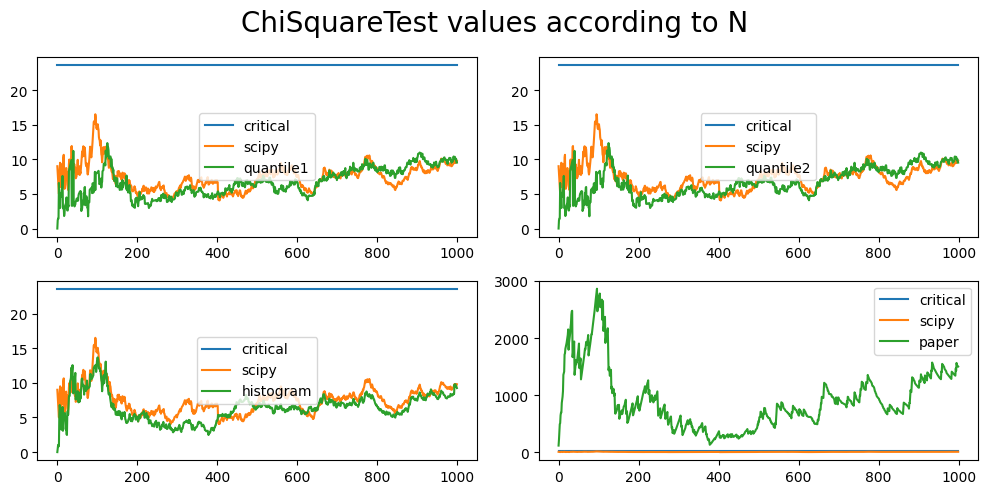

In [4]:
print('The hypothesis fails to reject if the chi2 value is below the critical value \n')

fig, ax = plt.subplots(2, 2, figsize=(10,5))

fig.suptitle('ChiSquareTest values according to N', fontsize=20)

ax[0, 0].plot(chi2_results['critical'], label='critical')
ax[0, 0].plot(chi2_results['scipy'], label='scipy')
ax[0, 0].plot(chi2_results['quantile1'], label='quantile1')
ax[0, 0].legend()

ax[0, 1].plot(chi2_results['critical'], label='critical')
ax[0, 1].plot(chi2_results['scipy'], label='scipy')
ax[0, 1].plot(chi2_results['quantile2'], label='quantile2')
ax[0, 1].legend()

ax[1, 0].plot(chi2_results['critical'], label='critical')
ax[1, 0].plot(chi2_results['scipy'], label='scipy')
ax[1, 0].plot(chi2_results['histogram'], label='histogram')
ax[1, 0].legend()

ax[1, 1].plot(chi2_results['critical'], label='critical')
ax[1, 1].plot(chi2_results['scipy'], label='scipy')
ax[1, 1].plot(chi2_results['paper'], label='paper')
ax[1, 1].legend()

#ax.set_xlim(50, 1000)
#ax.set_ylim(0, 100)

fig.tight_layout()